Radius (r) is : 50.91168824543143
Center (x, y) is : (240.0, 0.0)


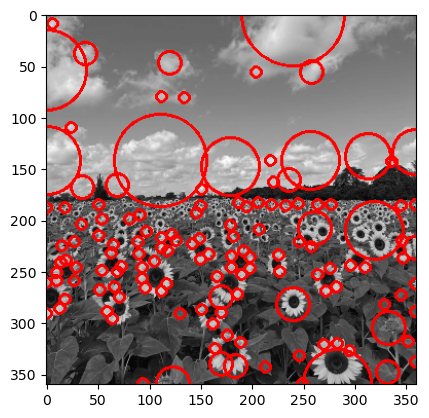

In [12]:
import cv2 as cv
import numpy as np
from skimage.feature import blob_log
from math import sqrt
import matplotlib.pyplot as plt

img = cv.imread('images/the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Create a three-channel grayscale image
gray_3_img = cv.merge([gray_img, gray_img, gray_img])

# Apply Gaussian blur to reduce noise
blur_gray_img = cv.GaussianBlur(gray_img, (9, 9), 0.1)

# Define parameters for blob detection
sigma_min = 4
sigma_max = 40
threshold = 0.08

# Detect blobs using Laplacian of Gaussians
blobs = blob_log(blur_gray_img, min_sigma = sigma_min,max_sigma = sigma_max, threshold=threshold)
blobs[:, 2] = blobs[:, 2] * sqrt(2)

max_rad_index = np.argmax(blobs[:, 2])
max_cir_param = blobs[max_rad_index]
y, x, r = max_cir_param
print(f"Radius (r) is : {r}")
print(f"Center (x, y) is : ({x}, {y})")

# Draw circles on the original grayscale image
for blob in blobs:
    y, x, r = blob  # Blob format is (y, x, r)
    cv.circle(gray_3_img, (int(x), int(y)), int(r), (0,0,255), 2)  # Draw circles in red
# Display the result
plt.imshow(cv.cvtColor(gray_3_img, cv.COLOR_BGR2RGB))
plt.show()